# 💸 Projeto Final | Sistema de Controle Financeiro

Deverá ser desenvolvido um sistema para controle financeiro que receba as movimentações e as armazena em um arquivo csv ou json.

O sistema deverá ser capaz de realizar as seguintes operações:

- **Criar** novos registros e identificar a data que o registro foi feito, qual tipo de movimentação, valor.

  - Os tipos podem ser:
    - Receita: o valor deve ser tratado como numérico e armazenado normalmente.
    - Despesas: o valor deve ser recebido como positivo, mas armazenado como negativo
    - Investimento: deve ter uma informação a mais de 'Montante', em que será calculado quanto o dinheiro rendeu desde o dia que foi investido.
    Para essa finalidade utilize a seguinte formula: $M = C * (1 + i)^t$ ([Saiba mais](https://matematicafinanceira.org/juros-compostos/)), considere tudo em dias.
- **Ler** registros: Deverá ser possível consultar os registros por data, tipo ou valor.
- **Atualizar** registros: No caso de atualização, pode-se atualizar o valor, o tipo e a data deverá ser a de atualização do registro.
- **Deletar**: Deverá ser possível deletar o registro (caso necessário, considere o indice do elemento como ID)

Outras funcionalidades:
- Crie uma função ```atualiza_rendimento``` que atualize os valores de rendimento sempre que chamada.
- Crie uma função ```exportar_relatorio```, que seja possível exportar um relatorio final em csv ou json.
- Crie pelo menos uma função de agrupamento, que seja capaz de mostrar o total de valor baseado em alguma informação (mes, tipo...)
- Crie valores separados para identificar a data (dia, mes, ano)

---

👩‍💻 **O que vai ser avaliado**:

- Se as funções e operações cuprem o seu objetivo
- Reprodutibilidade do código: vou executar!

👉🏻 **Envio do projeto**:
- Via LMS **individualmente.** <br>
  Apesar de ser em grupo, cada um de vocês precisa submeter o projeto.
- Formato: arquivo .py ou .ipynb.
- 📅 29/01, até as 23h59.

⚠️ **Atenção**:
- Não utilize a biblioteca pandas para resolução desse exercício




---



# Fluxograma Geral do Projeto

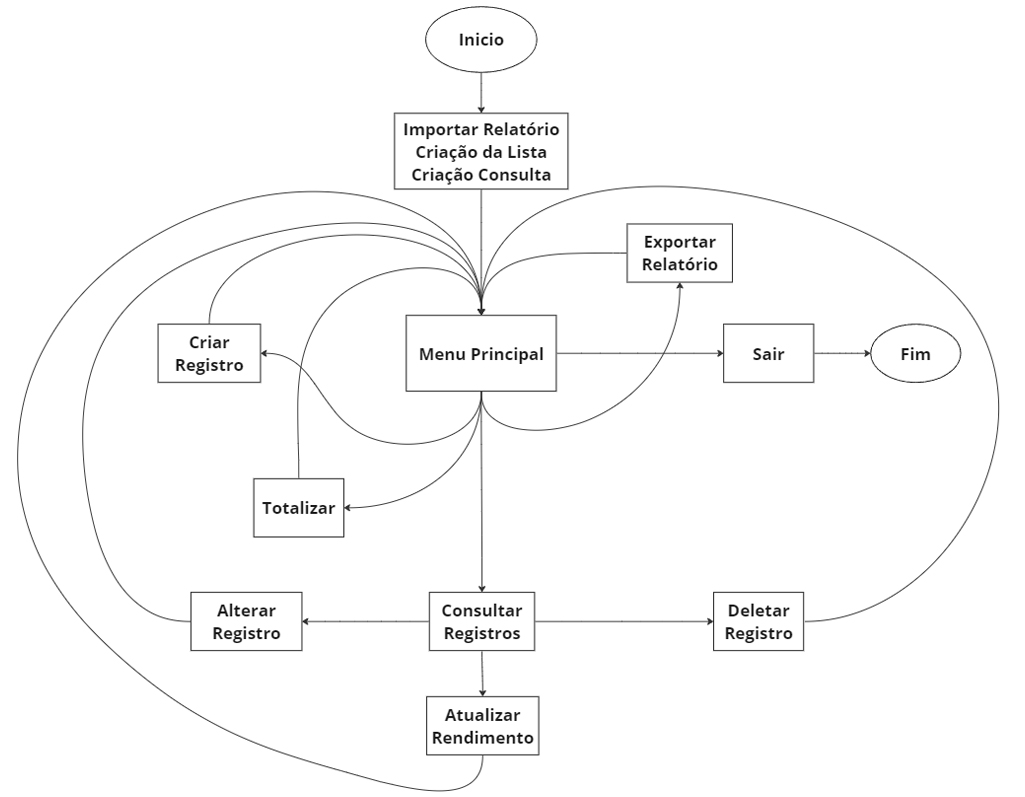

## 0. Pacote e Funções auxiliares

In [ ]:
from datetime import datetime, date
import os

In [ ]:
def validar_formato_data(data):
    try:
        # Tenta converter a string para um objeto datetime usando o formato esperado
        datetime_obj = datetime.strptime(data, '%d/%m/%Y')
        if datetime_obj <= datetime.now():
          return True
        else:
          return False
    except:
        # Se ocorrer um erro de ValueError, a string não está no formato esperado
        return False

In [ ]:
def validar_formato_valor(valor):
    try:
        # Tenta converter a string para um objeto datetime usando o formato esperado
        valor_novo = float(valor)
        return True
    except:
        # Se ocorrer um erro de ValueError, o valor não está no formato esperado
        return False

In [ ]:
def confirma_valor_positivo(valor):
  try:
    if float(valor) >= 0:
      return True
    else:
      return False
  except:
    return False

In [ ]:
def conversao_valor_float(valor):
  return round(float(valor),2)

In [ ]:
def descobrir_taxa_diaria(taxa_anual):
    dias_no_ano = 365
    taxa_anual /= 100
    taxa_diaria = (1 + taxa_anual)**(1/dias_no_ano) - 1
    return taxa_diaria


In [ ]:
def calcular_montante(valor,taxa,dias):
  return valor * (1 + taxa) ** dias

In [ ]:
def divisoria():
  print("\n------------------------------------------------------------------------------------------------------")

## 1. Funções

### 1.1 Criar Registro

In [ ]:
def criar_registro(tipo,valor, taxa_anual = 0, data_inicio = 0):
  # Data de hoje
  data_hoje = datetime.today()

  valor = float(valor)

  # Criação do registro
  registro = {"data":data_hoje.strftime("%d/%m/%Y"),
              "tipo":tipo.lower(),
              "valor":valor}

  # Criação do montante caso o tipo seja investimento
  if tipo.lower() == "investimento":

    # Cálculo da quantidade de dias entre a data fornecida e a data atual
    data_inicio = datetime.strptime(data_inicio,'%d/%m/%Y')
    diferenca_em_dias = (data_hoje - data_inicio).days

    # Cálculo da taxa anual
    taxa_diaria = descobrir_taxa_diaria(taxa_anual)

    montante = calcular_montante(float(valor),taxa_diaria,diferenca_em_dias)
    registro["montante"] = round(montante,2)

  # Criação da despesa com valor negativo
  elif tipo.lower() == "despesa":
    registro["valor"] = -1 * valor

  print("\n\nRegistro adicionado com sucesso!")
  divisoria()
  return registro

### 1.2 Ler Registros

Vai percorrer a lista de registros, procurando em cada dicionário[campo_de_busca] o valor_do_campo desejado e retornando em uma lista de registros correspondentes.


In [ ]:
def ler_registro():

  campos_validos = ["data", "tipo", "valor"]

  print("\nInforme através de qual campo deseja ler os registros: Data, Tipo ou Valor.\n")
  campo_de_busca = input("Campo: ").lower()
  while campo_de_busca not in campos_validos:
    print("\nCampo inválido! Digite uma das opções: Data, Tipo ou Valor.\n")
    campo_de_busca = input("Campo: ").lower()

  if campo_de_busca == "tipo":
    print("\n\nAgora, informe o tipo: Receita, Despesa ou Investimento.\n")
    valor_do_campo = input("Tipo: ")
    while valor_do_campo.lower() not in ["receita", "despesa","investimento"]:
      print("\nTipo inválido! informe o tipo: Receita, Despesa ou Investimento.\n")
      valor_do_campo = input("Tipo: ")
  elif campo_de_busca == "data":
    print("\n\nAgora, Informe a data em dd/mm/yyyy:\n")
    valor_do_campo = input("Data: ")
    while validar_formato_data(valor_do_campo) == False:
      print("\nData com formato inválido! Informe uma data correta em dd/mm/yyyy:\n")
      valor_do_campo = input("Data: ")
  else:
    print("\n\nAgora, Informe o valor.\n")
    valor_do_campo = input("Valor: ")
    while confirma_valor_positivo(valor_do_campo) == False:
      print("\nValor com formato inválido! Informe o valor em número positivo:\n")
      valor_do_campo = input("Valor: ")
    valor_do_campo = conversao_valor_float(valor_do_campo)

  # lista no programa principal
  global lista
  global consulta
  consulta = []
  for registro in lista:
    if campo_de_busca != "valor":
      if registro[campo_de_busca.lower()] == valor_do_campo.lower():
        consulta.append(registro)
    else:
      if registro[campo_de_busca.lower()] == valor_do_campo or registro[campo_de_busca.lower()] == (-1 * valor_do_campo):
        consulta.append(registro)


  if len(consulta) > 1:
    print(f"\n\nA sua consulta retornou {len(consulta)} resultados:\n")
  else:
    print(f"\n\nA sua consulta retornou {len(consulta)} resultado:\n")
  for registro in enumerate(consulta):
    print(f"{registro[0]+1} - {registro[1]}")
  divisoria()




### 1.3 Atualizar Registro

In [ ]:
def atualiza_registro(data,tipo,valor):
  global lista
  for registro in lista:
    # Encontrar o registro buscando os 3 principais campos
    if registro["data"] == data and registro["tipo"] == tipo.lower() and registro["valor"] == valor:
      print(f"\n\nRegistro encontrado! data: {registro['data']}, tipo: {registro['tipo']}, valor: {registro['valor']}\n")




      # Escolher qual o campo a ser alterado
      print("\nVocê quer alterar qual dos campos? Digite tipo ou valor\n")
      alteracao = input("Campo: ")
      while alteracao.lower() not in ["tipo","valor"]:
        print("\nVocê digitou um campo inválido. Digite tipo ou valor\n")
        alteracao = input("Campo: ")




      # Alteração do campo data automaticamente de acordo com o dia atual
      data_hoje = datetime.today()
      registro["data"] = data_hoje.strftime("%d/%m/%Y")




      # Alteração do campo tipo
      if alteracao.lower() == "tipo":
        print("\n\nAgora, digite o tipo atualizado: Receita, Despesa ou Investimento.\n")
        valor_alteracao = input("Tipo: ")
        while valor_alteracao.lower() not in ["despesa","receita","investimento"]:
          print("\n\nVocê digitou um tipo inválido. Digite o tipo atualizado: Receita, Despesa ou Investimento.\n")
          valor_alteracao = input("Tipo: ")

        print("\n")


        # tipo == receita: ele voltará identico caso já fosse receita no registro. Se fosse despesa, ele multiplica por -1 para ficar positivo. E, se fosse investimento, ele zera o montante.
        if valor_alteracao.lower() == "receita":

          if registro["tipo"] == "receita":
            return print(f"\nRegistro não atualizado. O tipo selecionado era o mesmo do registro")

          elif registro["tipo"] == "despesa":
            registro["tipo"] = "receita"
            registro["valor"] *= -1

          else:
            registro["tipo"] = "receita"
            registro.pop("montante")

          return print(f"\nRegistro Atualizado com sucesso! data: {registro['data']}, Tipo: {registro['tipo']}, Valor: {registro['valor']}")



        # tipo == despesa: Se fosse receita, multiplica por -1. Se fosse despesa, não muda nada. Se fosse, investimento, multiplica o valor por -1 e zera o montante.
        elif valor_alteracao.lower() == "despesa":

          if registro["tipo"] == "receita":
            registro["tipo"] = "despesa"
            registro["valor"] *= -1

          elif registro["tipo"] == "despesa":
            return print(f"\nRegistro não atualizado. O tipo selecionado era o mesmo do registro")

          else:
            registro["tipo"] = "despesa"
            registro["valor"] *= -1
            registro.pop("montante")

          return print(f"\nRegistro Atualizado com sucesso! Data: {registro['data']}, Tipo: {registro['tipo']}, Valor: {registro['valor']}")



        # tipo == investimento:
        else:

          if registro["tipo"] == "receita":
            registro["tipo"] = "investimento"

            data_inicio = input("Qual a data inicial do investimento?\n")
            while validar_formato_data(data_inicio) == False:
              data_inicio = input("\nData com formato incompatível. Digite uma data inicial válida dd/mm/yyyy:\n")

            data_inicio = datetime.strptime(data_inicio,'%d/%m/%Y')
            diferenca_dias = (data_hoje - data_inicio).days

            print("\nDigite a taxa anual de investimento:\n")
            taxa_anual = input("\nTaxa: ")
            while confirma_valor_positivo(taxa_anual) == False:
              print("\nValor inválido! Digite a taxa anual de investimento:\n")
              taxa_anual = input("\nTaxa: ")

            montante = calcular_montante(registro["valor"],descobrir_taxa_diaria(taxa_anual),diferenca_dias)
            registro["montante"] = round(montante,2)


          elif registro["tipo"] == "despesa":
            registro["tipo"] = "investimento"
            registro["valor"] *= -1

            data_inicio = input("Qual a data inicial do investimento?\n")
            while validar_formato_data(data_inicio) == False:
              data_inicio = input("\nData com formato incompatível. Digite uma data inicial válida dd/mm/yyyy:\n")

            data_inicio = datetime.strptime(data_inicio,'%d/%m/%Y')
            diferenca_dias = (data_hoje - data_inicio).days

            print("\nDigite a taxa anual de investimento:\n")
            taxa_anual = input("\nTaxa: ")
            while confirma_valor_positivo(taxa_anual) == False:
              print("\nValor inválido! Digite a taxa anual de investimento:\n")
              taxa_anual = input("\nTaxa: ")

            montante = calcular_montante(registro["valor"],descobrir_taxa_diaria(taxa_anual),diferenca_dias)
            registro["montante"] = round(montante,2)


          else:
            return print(f"\nRegistro não atualizado. O tipo selecionado era o mesmo do registro")

          return print(f"\nRegistro Atualizado com sucesso! Data: {registro['data']}, Tipo: {registro['tipo']}, Valor: {registro['valor']}, Montante: {registro['montante']}")





      # Alteração do campo valor
      else:

        valor_alteracao = input(f"Digite o valor atualizado \n")
        while confirma_valor_positivo(valor_alteracao) == False:
          valor_alteracao = input(f"Digite um valor válido, sendo número e maior que zero \n")
        valor_alteracao = conversao_valor_float(valor_alteracao)

        if registro["tipo"] == "despesa":
          registro["valor"] = -1 * valor_alteracao
        else:
          registro["valor"] = valor_alteracao

        return print(f"\nRegistro Atualizado com sucesso! Data: {registro['data']}, Tipo: {registro['tipo']}, Valor: {registro['valor']}")



  print("\nRegistro não encontrado")

### 1.4 Deletar Registro

In [ ]:
def deletar_registro(data,tipo,valor):
  global lista
  registro_removido = {}
  for registro in lista:
    if registro["data"] == data and registro["tipo"] == tipo.lower() and registro["valor"] == valor:
      registro_removido = registro
  print("\n\nRegistro deletado com sucesso!")
  return lista.remove(registro_removido)

### 1.5 Atualiza Rendimento

In [ ]:
def atualiza_rendimento(valor, taxa_rendimento_anual, data):
    # Cálculo da quantidade de dias entre a data fornecida e a data atual
    data_hoje = date.today()
    diferenca_em_dias = (data_hoje - data).days

    # Cálculo da taxa diária considerando a taxa de rendimento anual
    taxa_rendimento_diaria = descobrir_taxa_diaria(taxa_rendimento_anual)

    # Cálculo do rendimento atualizado
    novo_rendimento = valor * (1 + taxa_rendimento_diaria) ** diferenca_em_dias

    return novo_rendimento



### 1.6 Agrupa Registros

In [ ]:
#agrupamento
def extrair_ano(data_str):
    data_obj = datetime.strptime(data_str["data"], "%d/%m/%Y")
    return data_obj.year

def extrair_mes(data_str):
    data_obj = datetime.strptime(data_str["data"], "%d/%m/%Y")
    return data_obj.month

def extrair_dia(data_str):
    data_obj = datetime.strptime(data_str["data"], "%d/%m/%Y")
    return data_obj.day

def agrupar_por(lista, criterio):
    grupos = {}
    for registro in lista:
        chave = criterio(registro)
        if chave not in grupos:
            grupos[chave] = 0
        grupos[chave] += registro["valor"]
    return grupos

def agrupar_por_tipo(lista, tipo_escolhido):
    total_tipo = 0
    for registro in lista:
        if registro["tipo"] == tipo_escolhido:
            total_tipo += registro["valor"]
    return total_tipo

def agrupar_por_data(lista, data_escolhida):
    partes_data = data_escolhida.split('/')

    if len(partes_data) == 3:
        dia, mes, ano = map(int, partes_data)
        total_data = agrupar_por(lista, lambda x: (
            x["data"] and
            datetime.strptime(x["data"], "%d/%m/%Y").day == dia and
            datetime.strptime(x["data"], "%d/%m/%Y").month == mes and
            datetime.strptime(x["data"], "%d/%m/%Y").year == ano
        ))
    elif len(partes_data) == 2:
        mes, ano = map(int, partes_data)
        total_data = agrupar_por(lista, lambda x: (
            x["data"] and
            datetime.strptime(x["data"], "%d/%m/%Y").month == mes and
            datetime.strptime(x["data"], "%d/%m/%Y").year == ano
        ))
    elif len(partes_data) == 1:
        ano = int(partes_data[0])
        total_data = agrupar_por(lista, lambda x: (
            x["data"] and
            datetime.strptime(x["data"], "%d/%m/%Y").year == ano
        ))
    else:
        return 0  # Retorna 0 se a entrada for inválida

    return total_data.get(True, 0)  # Retorna o valor associado à chave True, ou 0 se a chave não existir


### 1.7 Importar Relatório (para lista inicial)

In [ ]:
def importar_relatorio(documento):
  global lista
  if documento in os.listdir('.'):
    with open(documento, mode = 'r') as arquivo:
      header = arquivo.readline().strip().split(",")
      linhas = arquivo.readlines()
      for l in linhas:
        registro = {}
        l = l.strip().split(",")
        registro[header[0]] = l[0]
        registro[header[1]] = l[1]
        registro[header[2]] = float(l[2])
        if l[3] not in [None,"None"]:
          registro[header[3]] = float(l[3])
        lista.append(registro)

  else:
    with open(documento, mode = 'w') as arquivo:
      pass

### 1.8 Exportar Relatório

In [ ]:
def exportar_relatorio(arquivo):

  with open("relatorio.csv", "w") as documento:

    cabecalho = "data,tipo,valor,montante" + "\n"
    documento.write(cabecalho)

    for registro in arquivo:
      linha = []

      for chave, valor in registro.items():
        linha.append(str(valor))
      if len(registro) > 3:
        linha = ",".join(linha)
      else:
        linha = ",".join(linha) + ",None"

      documento.write(linha + "\n")

  print("\nO relatorio.csv foi exportado com sucesso!")
  divisoria()


### 1.9 Menu Principal

In [ ]:
def menu_principal():

  global lista
  global consulta

  print("\nMenu do Sistema de Controle Financeiro do Grupo Cinco.")
  divisoria()
  print("\nQual operação você deseja fazer?\n")

  print("1 - Criar Novo Registro.\n\n2 - Consultar Registros.\n\n3 - Totalizar Registros.\n\n4 - Exportar Relatório.\n\n5 - Fechar Programa\n")
  menu = input("Escolha: ")

  # Enquanto não for imputado um número válido, voltará o input do menu.
  while True:
    divisoria()

    # Escolha 1 - Criar Novo Registro.
    if menu == "1":
      print("\nCerto! Você selecionou para criar um novo registro.\n")
      print("\nQual o tipo de registro que deseja fazer? Receita, Despesa ou Investimento.\n")
      tipo = input("Tipo: ").lower()
      while True:
        if tipo in ["receita","despesa","investimento"]:
          break
        else:
          print("\n\nOpção inválida! Digite um tipo entre Receita, Despesa ou Investimento.\n")
          tipo = input("Tipo: ").lower()

      print(f"\n\nVocê selecionou {tipo}. Agora, digite um valor em número positivo.\n")
      valor = input("Valor:")
      while confirma_valor_positivo(valor) == False:
        print("\n\nOpção Inválida! Digite um número positivo para continuar.\n")
        valor = input("Valor:")
      if tipo == "investimento":
        print("\n\nDigite a data inicial do investimento em dd/mm/yyyy.\n")
        data = input("Data: ")
        while validar_formato_data(data) == False:
          print("\n\nOpção Inválida! Digite a data inicial do investimento nof ormato correto em dd/mm/yyyy.\n")
          data = input("Data: ")
        novo = criar_registro(tipo= tipo, valor= valor, taxa_anual= taxa, data_inicio=data)
        lista.append(novo)
      else:
        novo = criar_registro(tipo=tipo, valor=valor)
        lista.append(novo)
      menu_principal()
      break

    # Escolha 2 - Ler Registros (Essa escolha leva a poder alterar o registro ou rendimento, assim como deletar)
    elif menu == "2":
      print("\nCerto! Você selecionou para consultar os registros.\n")
      ler_registro()
      contagem_registros = 0
      print("\nQual seria a ação que deseja tomar em seguida?\n")
      for registro in consulta:
        if registro['tipo'] == "investimento":
          contagem_registros +=1

      # Enquanto não for imputado um valor válido, será perguntado novamente o submenu
      while True:
        if contagem_registros > 0:
          submenu = input("1 - Alterar Registro.\n\n2 - Deletar Registro.\n\n3 - Atualizar Rendimento do Investimento\n\n9 - Voltar para o Menu Principal\n\nEscolha: ")
        else:
          submenu = input("1 - Alterar Registro.\n\n2 - Deletar Registro.\n\n9 - Voltar para o Menu Principal\n\nEscolha: ")
          while submenu not in ["1","2","9"]:
            divisoria()
            print("\nOpção Inválida! Escolha entre 1, 2 ou 9.\n")
            submenu = input("1 - Alterar Registro.\n\n2 - Deletar Registro.\n\n9 - Voltar para o Menu Principal\n\nEscolha: ")

        tamanho_consulta = len(consulta)
        # Alteração do Registro
        if submenu == "1":
          divisoria()
          print("\nOk! Alteração de Registro Selecionado.\n")
          print("\nEntre os registros lidos, qual você deseja alterar? Digite o ID\n")
          id = input("ID: ")

          while True:
            try:
              if confirma_valor_positivo(id):
                if int(id) <= tamanho_consulta:
                  break
                else:
                  print("Opção inválida! Digite um ID presente na consulta\n")
                  id = input("ID: ")
            except:
              print("Opção inválida! Digite um ID presente na consulta\n")
              id = input("ID: ")
          id = int(id)

          for i, registro in enumerate(consulta):
            if i == id-1:
              atualiza_registro(data=registro["data"],tipo=registro["tipo"],valor=registro["valor"])

          divisoria()
          menu_principal()
          break

        # Deletar Registro
        elif submenu == "2":
          divisoria()

          print("\nOk! Deletar Registro Selecionado.\n")

          print("\nEntre os registros lidos, qual você deseja alterar? Digite o ID\n")
          id = input("ID: ")
          while True:
            try:
              if confirma_valor_positivo(id):
                if int(id) <= tamanho_consulta:
                  break
                else:
                  print("Opção inválida! Digite um ID presente na consulta\n")
                  id = input("ID: ")
            except:
              print("Opção inválida! Digite um ID presente na consulta\n")
              id = input("ID: ")
          id = int(id)

          for i, registro in enumerate(consulta):
            if i == id-1:
              deletar_registro(data=registro["data"],tipo=registro["tipo"],valor=registro["valor"])

          divisoria()
          menu_principal()
          break

        # Alterar Rendimento
        elif submenu == "3":
          divisoria()

          print("\nOk! Deletar Registro Selecionado.\n")

          print("\nEntre os registros lidos, qual você deseja alterar? Digite o ID\n")
          id = input("ID: ")
          while True:
            try:
              if confirma_valor_positivo(id):
                if int(id) <= tamanho_consulta:
                  break
                else:
                  print("Opção inválida! Digite um ID presente na consulta\n")
                  id = input("ID: ")
            except:
              print("Opção inválida! Digite um ID presente na consulta\n")
              id = input("ID: ")
          id = int(id)

          for i, registro in enumerate(consulta):
            if i == id-1:
              deletar_registro(data=registro["data"],tipo=registro["tipo"],valor=registro["valor"])

          divisoria()
          atualiza_rendimento(valor, taxa_rendimento_anual, data)

          menu_principal()
          break

        # Voltar ao Menu Principal
        elif submenu == "9":
          divisoria()
          menu_principal()
          break

        else:
          print("\nOpção Inválida! Escolha entre 1, 2, 3 ou 9.\n")
          submenu = input("1 - Alterar Registro.\n\n2 - Deletar Registro.\n\nn9 - Voltar para o Menu Principal\n\nEscolha: ")

      break

    # Escolha 3 - Totalizador de Valores
    elif menu == "3":
      print("\nCerto! Você selecionou para totalizar os valores dos registros.\n")
      while True:
        escolha = input("Deseja totalizar por:\n1. Tipo\n2. Ano\n3. Mês\n4. Dia\n9. Ou retornar ao menu principal? ")
        if escolha == '1':
          tipo_escolhido = input("Escolha o tipo:\n1. Receita\n2. Despesa\n3. Investimento\nDigite o número correspondente ao tipo desejado: ")
          tipo_escolhido = {1: "Receita", 2: "Despesa", 3: "Investimento"}.get(int(tipo_escolhido)).lower()
          agrupamento = agrupar_por_tipo(lista, tipo_escolhido)
          print(f" Total'{tipo_escolhido.capitalize()}': {agrupamento}")

        elif escolha == '2' or escolha == '3' or escolha == '4':
          data_escolhida = input("Digite a data (d/m/y, m/y ou y): ")
          agrupamento = agrupar_por_data(lista, data_escolhida)
          print(f"Total {escolha.capitalize()} '{data_escolhida}': {agrupamento}")

        else:
          print("Escolha inválida. Por favor, escolha \n1. Tipo\n2. Ano\n3. Mês\n4. Dia\n9. Ou retornar ao menu principal?\n")
        break

    # Escolha 4 - Exportar Relatório
    elif menu == "4":
      print("\nCerto! Você selecionou para exportar o relatório.\n")
      exportar_relatorio(lista)
      menu_principal()
      break

    # Escolha 5 - Sair do Programa
    elif menu == "5":
      break

    else:
      print("\nOpção inválida! Digite um valor de 1 a 5\n")
      menu = input("1 - Criar Novo Registro.\n\n2 - Consultar Registros.\n\n3 - Totalizar Registros.\n\n4 - Exportar Relatório.\n\n5 - Fechar Programa\n\nEscolha: ")

## 2. Testes

In [ ]:
lista = []

In [ ]:
lista.append(criar_registro("Receita",1050))
lista.append(criar_registro("Despesa",1050))
lista.append(criar_registro("Investimento",1000,20,"01/01/2024"))
lista.append(criar_registro("Receita",3000.00))
lista.append(criar_registro("Despesa",400))
lista.append(criar_registro("Investimento",1000,20,"01/01/2023"))



In [ ]:
consulta = []

In [ ]:
print(lista)

In [ ]:
ler_registro()

In [ ]:
consulta

In [ ]:
atualiza_registro(data = "01/01/2024",tipo = "receita",valor = 1050)

In [ ]:
# Define rendimento anual
taxa_rendimento_anual = 15  # Taxa anual de 15%

# Atualiza o rendimento
rendimento_atualizado = atualiza_rendimento(valor, taxa_rendimento_anual, data)
print(f"Rendimento atualizado de {data} até hoje: {rendimento_atualizado}\n")


In [ ]:
print(lista)

In [ ]:
exportar_relatorio(lista)

## 3. Programa Principal

In [ ]:
lista = []
consulta = []
taxa = 20

importar_relatorio("relatorio.csv")

menu_principal()